In [1]:
import pandas as pd
import geopandas as gpd
import numpy as np

from tqdm import tqdm_notebook

import matplotlib.pyplot as plt
%matplotlib inline


import os

data_path = '/home/fterroso/data/'

/home/fterroso/python/lib/python3.6/site-packages/geopandas/_compat.py:88: UserWarning: The Shapely GEOS version (3.8.0-CAPI-1.13.1 ) is incompatible with the GEOS version PyGEOS was compiled with (3.8.1-CAPI-1.13.3). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
import datetime
e_date = datetime.datetime.strptime('2020-06-20', '%Y-%m-%d') #datetime.datetime.now()
i_date = datetime.datetime.strptime('2020-04-01', '%Y-%m-%d')

from datetime import date, timedelta

delta = e_date - i_date       # as timedelta

target_days = []
for i in range(delta.days + 1):
    day = i_date + timedelta(days=i)
    target_days.append(day)

In [4]:
def read_OD_fn(source_type):
    ods = {}
    for date in tqdm_notebook(target_days):
        od_date= pd.read_csv(os.path.join('data', 'OD', 'date_{}_OD_{}.csv'.format(source_type,date.strftime('%Y-%m-%d'))), 
                            index_col=0)
        ods[date] = od_date
    return ods

In [5]:
twt_ods = read_OD_fn('TWT')

In [6]:
ine_ods = read_OD_fn('INE')

## Fix data gaps

### OD with too many values (wrong aggregation)

In [7]:
date_ = datetime.datetime.strptime('2020-04-07', '%Y-%m-%d')

twt_od = twt_ods[date_]
twt_od_fixed = twt_od /2
twt_ods[date_] = twt_od_fixed

### OD with zero values (extrapolation from previous and next day)

In [8]:
date_missing_ = datetime.datetime.strptime('2020-04-08', '%Y-%m-%d')
twt_missing_od = twt_ods[date_missing_]

twt_missing_od.tail()

,001A,001B,001M,001S,001V,002A,002B,002M,002S,002V,...,40TF,57TF,58TF,43AL,44AL,45AL,53MA,79MA,80MA,total
45AL,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
53MA,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
79MA,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
80MA,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
total,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
date_ = datetime.datetime.strptime('2020-04-09', '%Y-%m-%d')
twt_ref_od = twt_ods[date_]

twt_missing_od = (twt_od_fixed + twt_ref_od)/2

twt_missing_od.tail()

,001A,001B,001M,001S,001V,002A,002B,002M,002S,002V,...,40TF,57TF,58TF,43AL,44AL,45AL,53MA,79MA,80MA,total
45AL,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.00
53MA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00
79MA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.00
80MA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00
total,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,5.5,2.0,0.0,2.5,0.0,1951.75


In [10]:
twt_ods[date_missing_] = twt_missing_od

In [11]:
date_ = datetime.datetime.strptime('2020-04-01', '%Y-%m-%d')

In [12]:
twt_od = twt_ods[date_]
ine_od = ine_ods[date_]

In [13]:
twt_od.tail()

,001A,001B,001M,001S,001V,002A,002B,002M,002S,002V,...,40TF,57TF,58TF,43AL,44AL,45AL,53MA,79MA,80MA,total
45AL,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
53MA,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
79MA,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
80MA,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
total,0,2,0,1,0,2,2,0,0,0,...,0,0,0,0,3,0,0,5,0,2375


In [14]:
ine_od.tail()

,001A,001B,001M,001S,001V,002A,002B,002M,002S,002V,...,40TF,57TF,58TF,43AL,44AL,45AL,53MA,79MA,80MA,total
45AL,0,0,0,0,0,0,0,0,0,0,...,0,0,0,735,1136,0,0,0,0,2313
53MA,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,919,229,2566
79MA,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,551,0,225,1871
80MA,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,121,180,0,618
total,108,402,0,0,241,779,702,245,0,446,...,1790,1221,1218,1130,6398,4003,1997,3045,608,2213123


## Number of origins and destinations per MA

In [15]:
def generate_avg_n_origin_destinations_fn(global_od, source, trip_rate_threshold):
    norm_twt_od_global = global_od.div(global_od['total'], axis=0)
    norm_twt_od_global['n_meaningful_dest'] = norm_twt_od_global.apply(lambda row: row[row>trip_rate_threshold].shape[0], axis=1)
    
    trasnsposed_norm_od= norm_twt_od_global.T
    trasnsposed_norm_od['n_meaningful_dest'] = trasnsposed_norm_od.apply(lambda row: row[row>trip_rate_threshold].shape[0], axis=1)
    
    norm_twt_od_global['type'] = 'destination'
    trasnsposed_norm_od['type'] = 'origin'
    
    df = pd.concat([trasnsposed_norm_od['n_meaningful_dest type'.split()],
                norm_twt_od_global['n_meaningful_dest type'.split()]], axis=0)
    
    df['source']= source
    
    return df

In [16]:
def generate_n_origin_dest_global_fn(trip_rate_threshold):
    twt_od_global= pd.read_csv(os.path.join('data', 'OD', 'global_TWT_OD.csv'), index_col=0)
    twt_n_origin_dest_df = generate_avg_n_origin_destinations_fn(twt_od_global, 'TWT', trip_rate_threshold)
    
    ine_od_global= pd.read_csv(os.path.join('data', 'OD', 'global_INE_OD.csv'), index_col=0)
    ine_n_origin_dest_df = generate_avg_n_origin_destinations_fn(ine_od_global, 'INE', trip_rate_threshold)
    
    _df = pd.concat([twt_n_origin_dest_df, ine_n_origin_dest_df], axis=0)
    
    return _df

In [17]:
n_origin_dest_0_df = generate_n_origin_dest_global_fn(0)

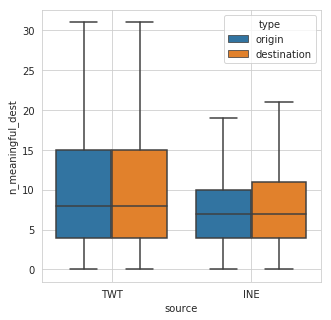

In [18]:
import seaborn as sns

plt.figure(figsize=(5,5))
sns.set_style("whitegrid")
ax=sns.boxplot(data=n_origin_dest_0_df, x='source', y='n_meaningful_dest',hue='type', showfliers = False);
ax.grid(True)

In [19]:
n_origin_dest_005_df = generate_n_origin_dest_global_fn(0.05)

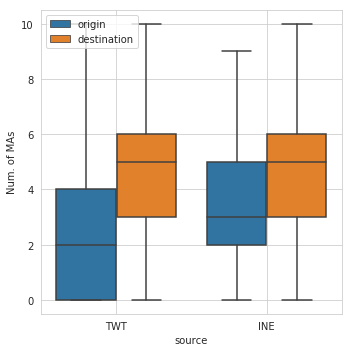

In [20]:
import seaborn as sns

plt.figure(figsize=(5,5))
sns.set_style("whitegrid")
ax=sns.boxplot(data=n_origin_dest_005_df, x='source', y='n_meaningful_dest',hue='type', showfliers = False);
ax.set_ylabel("Num. of MAs")
ax.grid(True)
plt.tight_layout()
plt.legend(loc='upper left')
plt.savefig(os.path.join('figs', 'n_origin_dest_ma.png'))

## Distribution of distances

In [21]:
ma_distance_od_df = pd.read_csv(os.path.join('data', 'ma_distances.csv'), index_col=0)

In [22]:
ma_distance_od_df.head()

,001A,001B,001M,001S,001V,002A,002B,002M,002S,002V,...,73AS,40TF,57TF,58TF,43AL,44AL,45AL,53MA,79MA,80MA
001A,0.000000,466.875557,312.320477,476.523729,116.362859,6.715878,440.190594,326.430362,443.531254,114.916680,...,749.789923,1862.126576,1860.836006,1857.112550,228.454023,225.783090,232.641895,380.938105,382.538811,385.848697
001B,466.875557,0.000000,449.512986,810.510459,350.567288,460.172644,26.855270,462.293254,778.497478,352.064149,...,657.397322,2274.851291,2274.015567,2269.771793,679.570131,678.800729,683.703748,800.555878,800.102315,805.302976
001M,312.320477,449.512986,0.000000,372.340333,290.850833,309.389704,427.383610,16.619024,343.110357,292.062902,...,441.340212,1843.865552,1843.303454,1838.774283,376.676736,380.175908,379.425391,421.967528,419.320046,425.763693
001S,476.523729,810.510459,372.340333,0.000000,544.052395,479.390201,786.225295,364.200620,33.800450,544.036311,...,642.757279,1471.566038,1470.990567,1466.474897,319.445052,326.052913,317.783345,194.395801,188.873886,193.444839
001V,116.362859,350.567288,290.850833,544.052395,0.000000,109.674708,323.914908,307.190363,510.263080,1.897730,...,702.170227,1964.201681,1963.035126,1959.163938,337.788522,335.989215,341.999669,478.892592,479.694102,483.819502


In [23]:
def generate_ranking_from_od_fn(global_od, source):
    
    od_no_total= global_od.drop('total')
    od_no_totals= od_no_total.drop(columns='total')
    trips_rank_df = od_no_totals.rank(ascending=False, method='first', axis=1)
    
    distance_ranking_list= [] 
    for o_, row in trips_rank_df.iterrows():
        meaningful_dest = row[row<=10]
        for d_, rank_ in meaningful_dest.items():
            dist = ma_distance_od_df.loc[o_,d_]
            distance_ranking_list.append((o_, d_, rank_, dist, source))
    
    distance_ranking_df = pd.DataFrame.from_records(distance_ranking_list, columns='origin destination ranking distance source'.split())
    return distance_ranking_df

In [24]:
twt_od_global= pd.read_csv(os.path.join('data', 'OD', 'global_TWT_OD.csv'), index_col=0)

In [25]:
twt_trips_rank_df = generate_ranking_from_od_fn(twt_od_global, 'TWT')

In [26]:
ine_od_global= pd.read_csv(os.path.join('data', 'OD', 'global_INE_OD.csv'), index_col=0)

In [27]:
ine_trips_rank_df = generate_ranking_from_od_fn(ine_od_global, 'INE')

In [28]:
trips_rank_df = pd.concat([twt_trips_rank_df, ine_trips_rank_df], axis=0)

In [29]:
trips_rank_df.head()

,origin,destination,ranking,distance,source
0,001A,001A,6.0,0.000000,TWT
1,001A,001B,7.0,466.875557,TWT
2,001A,001M,8.0,312.320477,TWT
3,001A,001S,9.0,476.523729,TWT
4,001A,001V,10.0,116.362859,TWT


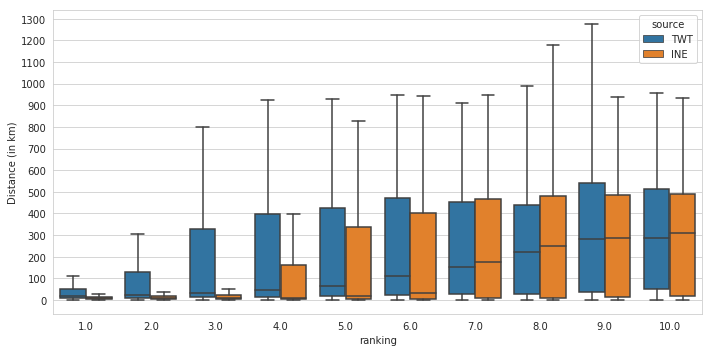

In [30]:
plt.figure(figsize=(10,5))
sns.set_style("whitegrid")
g= sns.boxplot(data=trips_rank_df, x='ranking', y='distance', hue='source', showfliers = False);
g.set_yticks(np.arange(0,1400,100));
g.set_ylabel("Distance (in km)");
plt.tight_layout()
plt.savefig(os.path.join('figs', 'distances_origin_dest_ma.png'))

## Comparison methods

In [31]:
from sklearn.metrics import mean_squared_error

In [32]:
def compare_column_ODs_fn(twt_od, ine_od,date_):
    twt_od = twt_od.fillna(0)
    ine_od = ine_od.fillna(0)
    results = []
    ids_ = ine_od.columns.tolist()
    for id_ in ids_:
        row_twt= twt_od[id_]
        row_ine = ine_od[id_]
        
        columns_ine = row_ine[row_ine>0].index.tolist()
        columns_twt = row_twt[row_twt>0].index.tolist()
        
        target_columns = set(columns_ine).union(set(columns_twt))
        if len(target_columns)>0:
            target_columns.remove('total')
            frow_twt = row_twt[target_columns]
            frow_ine = row_ine[target_columns]

            norm_rown_ine= frow_ine
            sum_ine= sum(frow_ine)
            if sum_ine >0:
                norm_rown_ine= frow_ine/sum_ine

            norm_rown_twt= frow_twt
            sum_twt= sum(frow_twt)
            if sum_twt>0:
                norm_rown_twt= frow_twt/sum_twt

            corr_= frow_ine.corr(frow_twt)           
            rmse_= mean_squared_error(norm_rown_ine, norm_rown_twt)           
            
            intersect_columns = set(columns_ine).intersection(set(columns_twt))
            overlap = len(intersect_columns)/len(target_columns)

            results.append((id_, corr_, rmse_, overlap, date_))
    
    return results

In [33]:
def compare_row_ODs_fn(twt_od, ine_od,date_):
    twt_od = twt_od.fillna(0)
    ine_od = ine_od.fillna(0)
    results = []
    ids_ = ine_od.index.tolist()
    for id_ in ids_:
        row_twt= twt_od.loc[id_]
        row_ine = ine_od.loc[id_]
        
        columns_ine = row_ine[row_ine>0].index.tolist()
        columns_twt = row_twt[row_twt>0].index.tolist()
        
        target_columns = set(columns_ine).union(set(columns_twt))
        if len(target_columns)>0:
            target_columns.remove('total')
            frow_twt = row_twt[target_columns]
            frow_ine = row_ine[target_columns]

            norm_rown_ine= frow_ine
            sum_ine= sum(frow_ine)
            if sum_ine >0:
                norm_rown_ine= frow_ine/sum_ine

            norm_rown_twt= frow_twt
            sum_twt= sum(frow_twt)
            if sum_twt>0:
                norm_rown_twt= frow_twt/sum_twt

            corr_= frow_ine.corr(frow_twt)           
            rmse_= mean_squared_error(norm_rown_ine, norm_rown_twt)
            
            intersect_columns = set(columns_ine).intersection(set(columns_twt))
            overlap = len(intersect_columns)/len(target_columns)

            results.append((id_, corr_, rmse_, overlap, date_))
    
    return results

In [34]:
def generate_comparive_fn(axis=0):
    all_results = []
    comparison_method = compare_row_ODs_fn
    if axis==1:
        comparison_method= compare_column_ODs_fn
        
    for d in tqdm_notebook(target_days):
        date_results = comparison_method(twt_ods[d], ine_ods[d],d)
        all_results= all_results + date_results
    results_df = pd.DataFrame.from_records(all_results, columns='MA_id corr rmse overlap date'.split())
    results_df= results_df.dropna(axis=0)
    results_df['date'] = results_df['date'].astype(str)
    
    return results_df

## Compare outgoing flows

In [35]:
date_results_df=generate_comparive_fn(axis=0)

In [36]:
date_results_df.head()

,MA_id,corr,rmse,overlap,date
1,001B,-0.989486,0.167236,0.2,2020-04-01
3,002A,-1.000000,0.581150,1.0,2020-04-01
4,002B,-1.000000,1.000000,0.5,2020-04-01
15,005A,-0.766570,0.257018,0.2,2020-04-01
17,005M,-1.000000,1.000000,0.5,2020-04-01


In [37]:
import seaborn as sns

### Pearson correlation

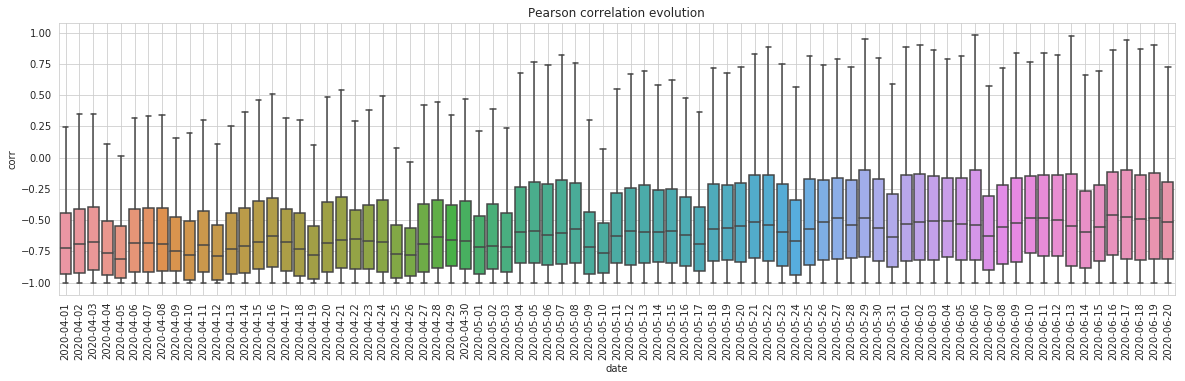

In [38]:
plt.figure(figsize=(20,5))
sns.set_style("whitegrid")
ax= sns.boxplot(data=date_results_df, x='date', y='corr',showfliers = False);
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.grid(True)
plt.title("Pearson correlation evolution");

### RMSE

In [39]:
median_date_results_df= date_results_df.groupby('date')['rmse'].median().to_frame()

In [40]:
median_date_results_df.reset_index().head()

,date,rmse
0,2020-04-01,0.214184
1,2020-04-02,0.200890
2,2020-04-03,0.200834
3,2020-04-04,0.250307
4,2020-04-05,0.262660


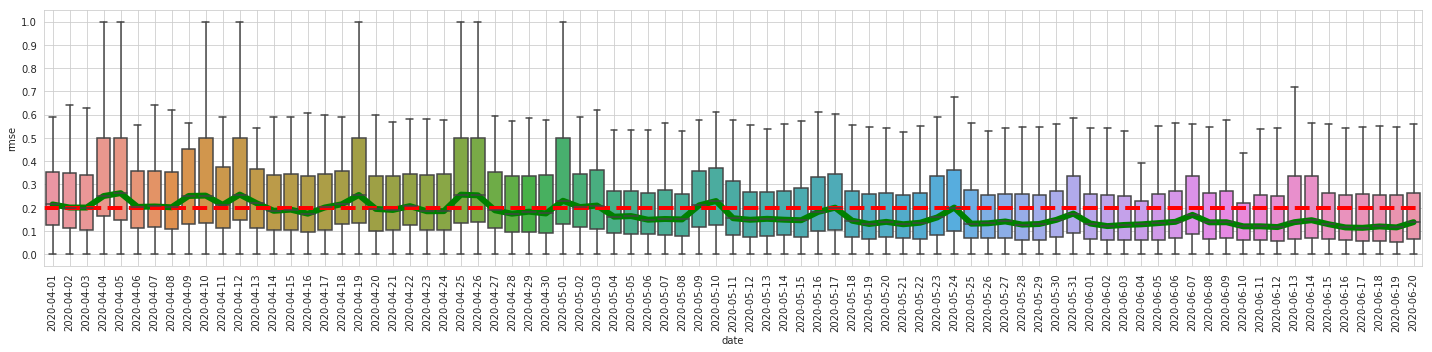

In [41]:
plt.figure(figsize=(20,5))
sns.set_style("whitegrid")
ax=sns.boxplot(data=date_results_df, x='date', y='rmse',showfliers = False);

ax = sns.lineplot(data=median_date_results_df.reset_index(), x='date', y='rmse',ax=ax, linewidth=6, color='green')

ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_yticks(np.arange(0,1.1,0.1))

ax.axhline(0.2, linewidth=4, color='red', linestyle='--')

ax.grid(True)
#plt.title("RMSE evolution (outgoing flow)");
plt.tight_layout()
plt.savefig(os.path.join('figs', 'rmse_outgoing.png'))

### Destinations overlap

In [42]:
median_date_results_df= date_results_df.groupby('date')['overlap'].median().to_frame()

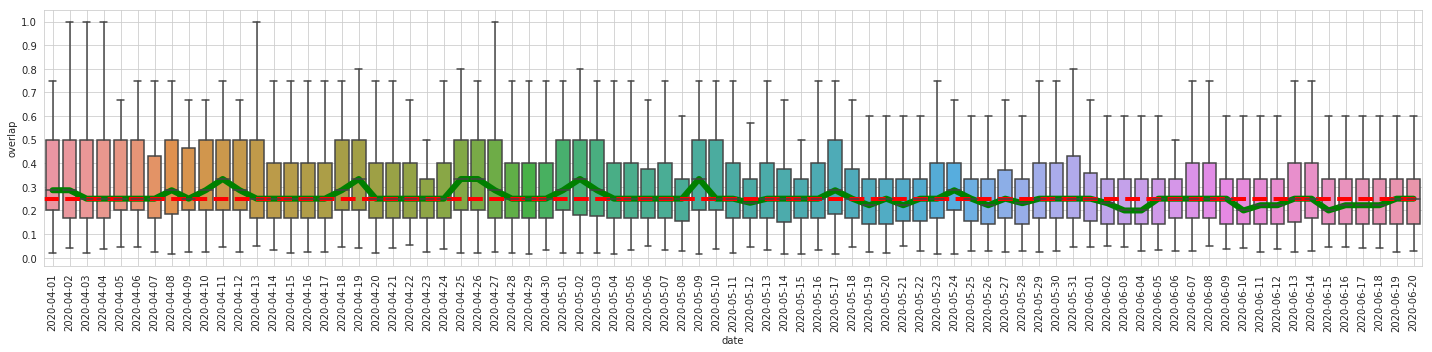

In [43]:
plt.figure(figsize=(20,5))
sns.set_style("whitegrid")
ax=sns.boxplot(data=date_results_df, x='date', y='overlap',showfliers = False);

ax = sns.lineplot(data=median_date_results_df.reset_index(), x='date', y='overlap',ax=ax, linewidth=6, color='green')

ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_yticks(np.arange(0,1.1,0.1))

ax.axhline(0.25, linewidth=4, color='red', linestyle='--')

ax.grid(True)
#plt.title("Destination overlap evolution");
plt.tight_layout()
plt.savefig(os.path.join('figs', 'dest_overlap.png'))

## Compare incoming flows

In [44]:
date_results_df=generate_comparive_fn(axis=1)

In [45]:
date_results_df.head()

,MA_id,corr,rmse,overlap,date
1,001B,-0.961866,0.504492,0.333333,2020-04-01
4,002A,-1.000000,0.567808,1.000000,2020-04-01
5,002B,-0.542822,0.383204,0.250000,2020-04-01
9,003B,-1.000000,1.000000,0.500000,2020-04-01
17,005M,-1.000000,1.000000,0.500000,2020-04-01


### RMSE evol

In [46]:
median_date_results_df= date_results_df.groupby('date')['rmse'].median().to_frame()

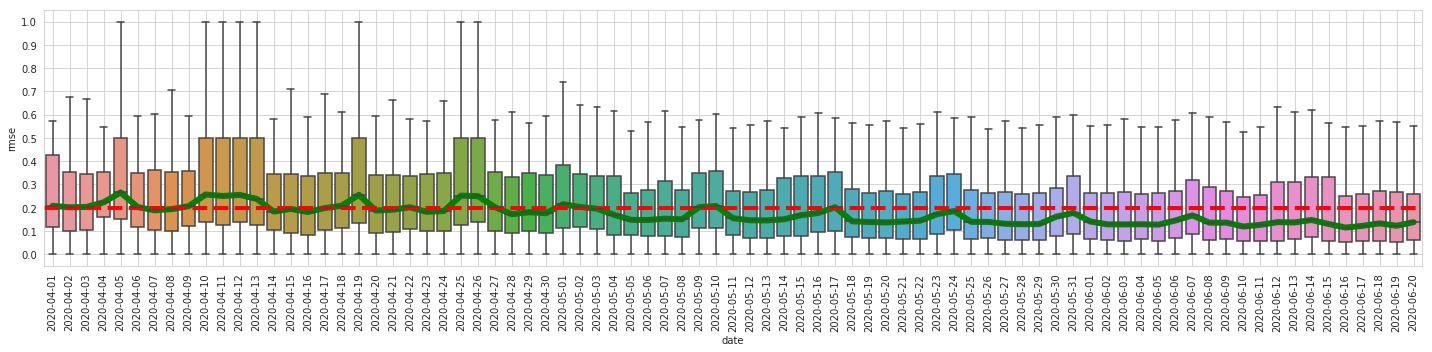

In [47]:
plt.figure(figsize=(20,5))
sns.set_style("whitegrid")
ax=sns.boxplot(data=date_results_df, x='date', y='rmse',showfliers = False);

ax = sns.lineplot(data=median_date_results_df.reset_index(), x='date', y='rmse',ax=ax, linewidth=6, color='green')

ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_yticks(np.arange(0,1.1,0.1))

ax.axhline(0.2, linewidth=4, color='red', linestyle='--')

ax.grid(True)
#plt.title("RMSE evolution (incoming flow)");
plt.tight_layout()
plt.savefig(os.path.join('figs', 'rmse_incoming.png'))

In [48]:
median_date_results_df= date_results_df.groupby('date')['overlap'].median().to_frame()

### Origin overlap

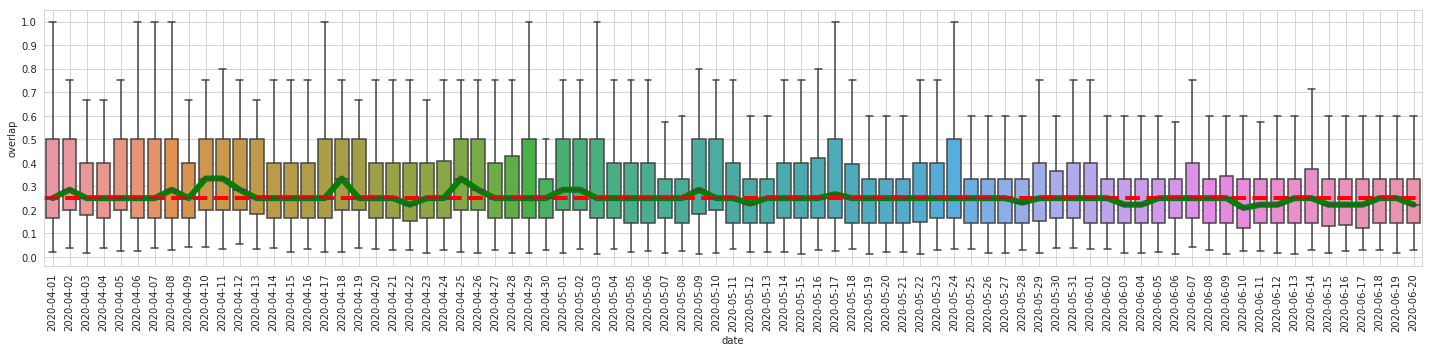

In [49]:
plt.figure(figsize=(20,5))
sns.set_style("whitegrid")
ax=sns.boxplot(data=date_results_df, x='date', y='overlap',showfliers = False);

ax = sns.lineplot(data=median_date_results_df.reset_index(), x='date', y='overlap',ax=ax, linewidth=6, color='green')

ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_yticks(np.arange(0,1.1,0.1))

ax.axhline(0.25, linewidth=4, color='red', linestyle='--')

ax.grid(True)
#plt.title("Origin overlap evolution");
plt.tight_layout()
plt.savefig(os.path.join('figs', 'origin_overlap.png'))

## Compare number of active MAs

In [50]:
def calculate_num_orig_dest_fn():
    results = []
    for d in tqdm_notebook(target_days):
        twt_n_origins = twt_ods[d][twt_ods[d]['total']>0].shape[0]-1 #We remove the 'total' row/column
        twt_n_destinations = twt_ods[d].loc['total'][twt_ods[d].loc['total']>0].shape[0]-1
        
        results.append((twt_n_origins, 'origin', 'TWT',d))
        results.append((twt_n_destinations, 'destination', 'TWT',d))

        
        ine_n_origins = ine_ods[d][ine_ods[d]['total']>0].shape[0]-1
        ine_n_destinations =ine_ods[d].loc['total'][ine_ods[d].loc['total']>0].shape[0]-1
        
        results.append((ine_n_origins, 'origin', 'INE',d))
        results.append((ine_n_destinations, 'destination', 'INE',d))
        
    result_df= pd.DataFrame(results, columns='number type source date'.split())
    result_df['date'] = result_df['date'].astype(str)

    return result_df

In [51]:
n_origin_dest_df = calculate_num_orig_dest_fn()

In [52]:
n_origin_dest_df.head()

,number,type,source,date
0,668,origin,TWT,2020-04-01
1,639,destination,TWT,2020-04-01
2,2542,origin,INE,2020-04-01
3,2490,destination,INE,2020-04-01
4,670,origin,TWT,2020-04-02


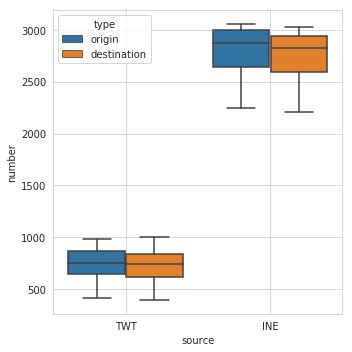

In [53]:
plt.figure(figsize=(5,5))
sns.set_style("whitegrid")
ax=sns.boxplot(data=n_origin_dest_df, x='source', y='number',hue='type', showfliers = False);
ax.grid(True)
#plt.title("Number of origin-destinations (no threshold)");
plt.tight_layout()
plt.savefig(os.path.join('figs', 'num_origin_dest_ma.png'))

In [54]:
n_origin_df = n_origin_dest_df[n_origin_dest_df['type']=='origin']
n_dest_df = n_origin_dest_df[n_origin_dest_df['type']=='destination']

In [55]:
n_origin_df.head()

,number,type,source,date
0,668,origin,TWT,2020-04-01
2,2542,origin,INE,2020-04-01
4,670,origin,TWT,2020-04-02
6,2538,origin,INE,2020-04-02
8,625,origin,TWT,2020-04-03


### Number of MAs acting as trip origin

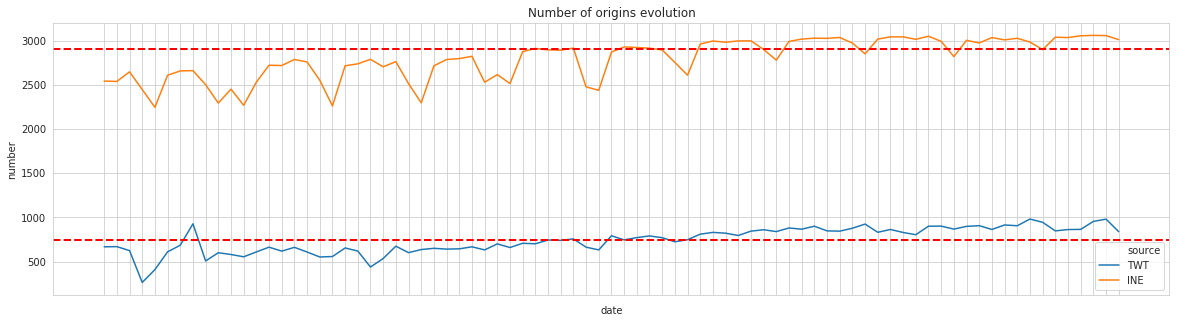

In [56]:
plt.figure(figsize=(20,5))
sns.set_style("whitegrid")

ax = sns.lineplot(data=n_origin_df, x='date', y='number',hue='source')

ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

ax.axhline(750, linewidth=2, color='red', linestyle='--')
ax.axhline(2900, linewidth=2, color='red', linestyle='--')


ax.grid(True)
plt.title("Number of origins evolution");

#### Correlation

In [57]:
import scipy.stats as stats

In [58]:
r, p = stats.pearsonr(n_origin_df[n_origin_df['source']=='TWT']['number'], 
                      n_origin_df[n_origin_df['source']=='INE']['number'])
print(f"Scipy computed Pearson r: {r} and p-value: {p}")

Scipy computed Pearson r: 0.7881144281732596 and p-value: 2.526792217506677e-18


## Number of MAs acting as trip destinations

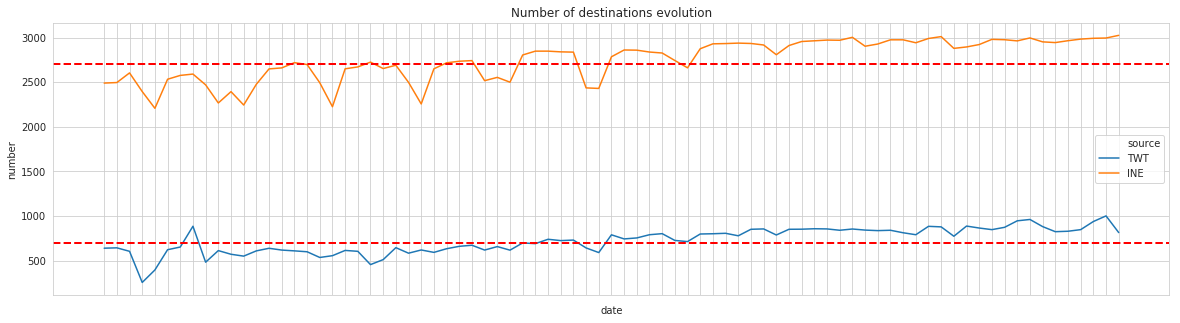

In [59]:
plt.figure(figsize=(20,5))
sns.set_style("whitegrid")

ax = sns.lineplot(data=n_dest_df, x='date', y='number',hue='source')

ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

ax.axhline(700, linewidth=2, color='red', linestyle='--')
ax.axhline(2700, linewidth=2, color='red', linestyle='--')


ax.grid(True)
plt.title("Number of destinations evolution");

In [60]:
import scipy.stats as stats

#### Correlation

In [61]:
r, p = stats.pearsonr(n_dest_df[n_dest_df['source']=='TWT']['number'], 
                      n_dest_df[n_dest_df['source']=='INE']['number'])
print(f"Scipy computed Pearson r: {r} and p-value: {p}")

Scipy computed Pearson r: 0.8298338600362551 and p-value: 1.0354248340024714e-21


## Evolution of the trips distances

In [62]:
ma_distances_df = pd.read_csv(os.path.join('data', 'ma_distances.csv'), index_col=0)

In [63]:
ma_distances_df.tail()

,001A,001B,001M,001S,001V,002A,002B,002M,002S,002V,...,73AS,40TF,57TF,58TF,43AL,44AL,45AL,53MA,79MA,80MA
44AL,225.783090,678.800729,380.175908,326.052913,335.989215,231.731616,651.957264,386.414428,299.657946,334.911680,...,802.729303,1638.017481,1636.661164,1633.018019,6.637178,0.000000,8.900048,171.112478,174.357879,175.619728
45AL,232.641895,683.703748,379.425391,317.783345,341.999669,238.511821,656.870795,385.306111,291.634713,340.952567,...,799.913104,1630.548283,1629.204481,1625.545988,4.213342,8.900048,0.000000,162.290078,165.507382,166.811755
53MA,380.938105,800.555878,421.967528,194.395801,478.892592,385.940968,774.212833,421.419553,180.912683,478.207871,...,787.070098,1485.375093,1484.229935,1480.334012,165.659096,171.112478,162.290078,0.000000,5.522617,4.933206
79MA,382.538811,800.102315,419.320046,188.873886,479.694102,387.479456,773.796429,418.582687,175.453807,479.029611,...,782.619158,1484.719424,1483.590072,1479.675738,168.806170,174.357879,165.507382,5.522617,0.000000,6.671281
80MA,385.848697,805.302976,425.763693,193.444839,483.819502,390.856705,778.968737,425.089292,180.777772,483.135664,...,789.187122,1480.453968,1479.309826,1475.412722,170.210049,175.619728,166.811755,4.933206,6.671281,0.000000


In [64]:
from itertools import repeat, combinations

In [65]:
date_ = datetime.datetime.strptime('2020-04-01', '%Y-%m-%d')
od = twt_ods[date_]

In [66]:
od_no_total =od.drop('total',axis=0)

In [67]:
od_no_totals = od_no_total.drop('total', axis=1)

In [68]:
# od_no_totals.tail()

In [69]:
results_df = od_no_totals.mul(ma_distances_df)

In [70]:
results_df.tail()

,001A,001B,001M,001S,001V,002A,002B,002M,002S,002V,...,73AS,40TF,57TF,58TF,43AL,44AL,45AL,53MA,79MA,80MA
44AL,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
45AL,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
53MA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
79MA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
80MA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [71]:
total_sum_by_ma = results_df.sum(axis=1)
total_sum_by_ma

001A      0.000000
001B    115.085989
001M      0.000000
001S      0.000000
001V      0.000000
           ...    
44AL      0.000000
45AL      0.000000
53MA      0.000000
79MA     12.536984
80MA      0.000000
Length: 3214, dtype: float64

In [72]:
avg_by_ma= (total_sum_by_ma /od['total']).fillna(0)

In [73]:
nozero_avg= avg_by_ma[avg_by_ma>0]

In [74]:
avg_dist = sum(nozero_avg)/len(nozero_avg)

In [75]:
from statistics import median

def calculate_avg_distance_trips_fn(od):
    od_no_total =od.drop('total',axis=0)
    od_no_totals = od_no_total.drop('total', axis=1)
    results_df = od_no_totals.mul(ma_distances_df)
    total_sum_by_ma = results_df.sum(axis=1)
    avg_by_ma= (total_sum_by_ma /od['total']).fillna(0)
    nozero_avg= avg_by_ma[avg_by_ma>0]
    if len(nozero_avg)>0:
        avg_dist = median(nozero_avg)#sum(nozero_avg)/len(nozero_avg)
        return avg_dist
    else:
        return 0

In [76]:
twt_avg_dist= []
for date, od in tqdm_notebook(twt_ods.items()): 
    dist_= calculate_avg_distance_trips_fn(od)
    twt_avg_dist.append((date, dist_))

In [77]:
twt_avg_dist_df = pd.DataFrame.from_records(twt_avg_dist,columns='date avg_dist'.split())
twt_avg_dist_df = twt_avg_dist_df.set_index('date')

In [78]:
ine_avg_dist= []
for date, od in tqdm_notebook(ine_ods.items()): 
    dist_= calculate_avg_distance_trips_fn(od)
    ine_avg_dist.append((date, dist_))

In [79]:
ine_avg_dist_df = pd.DataFrame.from_records(ine_avg_dist,columns='date avg_dist'.split())
ine_avg_dist_df = ine_avg_dist_df.set_index('date')

In [80]:
twt_avg_dist_df['ine_avg_dist']= ine_avg_dist_df['avg_dist']

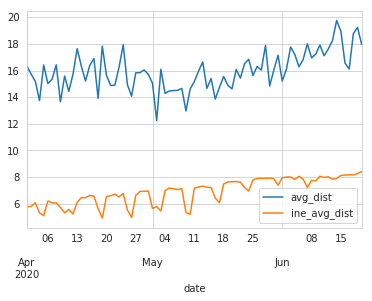

In [81]:
twt_avg_dist_df.plot(grid=True);

In [82]:
import scipy.stats as stats

In [83]:
r, p = stats.pearsonr(twt_avg_dist_df['avg_dist'], 
                      twt_avg_dist_df['ine_avg_dist'])
print(f"Scipy computed Pearson r: {r} and p-value: {p}")

Scipy computed Pearson r: 0.502449247852305 and p-value: 1.7565729103516587e-06


In [84]:
from statsmodels.tsa.seasonal import seasonal_decompose

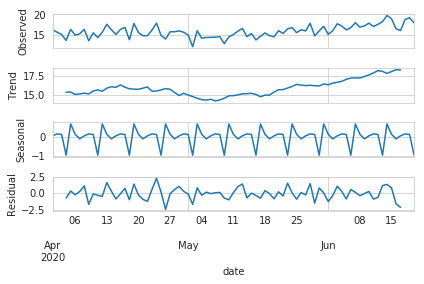

In [85]:
result = seasonal_decompose(twt_avg_dist_df['avg_dist'], model='additive', freq=7);
result.plot();

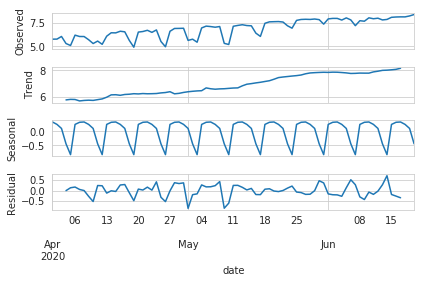

In [86]:
result = seasonal_decompose(twt_avg_dist_df['ine_avg_dist'], model='additive', freq=7);
result.plot();

### Dask mode (not work)

In [87]:
#import dask
#from dask.distributed import Client, progress
#client = Client(threads_per_worker=4, n_workers=10)
#client

In [88]:
def extract_distance_quantiles_fn(params_):
    
    date = params_[0]
    od= params_[1]
    
    dist_quantiles = (date,float('NaN'),float('NaN'),float('NaN'),float('NaN'),float('NaN'))                                  
    dist_dates =[]
    
    ma_ids = od.index.tolist()
    ma_ids.remove('total')
    for o_ma, d_ma in combinations(ma_ids, r=2):                    
        dist = ma_distances_df.loc[o_ma, d_ma]
        n_trips = od.loc[o_ma, d_ma]
        #print(n_trips)
        if n_trips >0:
            dist_dates = dist_dates + [i for i in repeat(dist,n_trips)]
        n_trips = od.loc[d_ma, o_ma]
        if n_trips >0:
            dist_dates = dist_dates + [i for i in repeat(dist,n_trips)]
        if len(dist_dates)>2:
            #print(dist_dates)
            dist_quantiles = (date,
                              np.percentile(dist_dates,0.10),
                              np.percentile(dist_dates,0.25),
                              np.percentile(dist_dates,0.50),
                              np.percentile(dist_dates,0.75),
                              np.percentile(dist_dates,0.90))
    
    return dist_quantiles

In [89]:
"""
lazy_results= []
for date, od in tqdm_notebook(twt_ods.items()):    
    lazy_result = dask.delayed(extract_distance_quantiles_fn)((date,od))
    lazy_results.append(lazy_result)
"""

'\nlazy_results= []\nfor date, od in tqdm_notebook(twt_ods.items()):    \n    lazy_result = dask.delayed(extract_distance_quantiles_fn)((date,od))\n    lazy_results.append(lazy_result)\n'

In [90]:
#futures = dask.persist(*lazy_results) 
#client.cluster.scale(10) 
#dist_quantiles = dask.compute(*futures)
#len(dist_quantiles)
#dist_quantiles_df = pd.DataFrame.from_records(dist_quantiles, columns='date q1 q2 q3 q4 q5'.split())
#dist_quantiles_df.to_csv(os.path.join('data', 'ma_distances_quantiles.csv'))

In [91]:
#todo: numero medio de origenes y destino por MA en INE y TWT